In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.2.4


In [5]:
students = {"Name": ["Braund, Mr. Owen Harris", "Allen, Mr. William Henry", "Bonnell, Miss. Elizabeth"], 
            "Marks": [22, 35, 58], 
            "Sex": ["male", "male", "female"]}

In [8]:
df = pd.DataFrame(data=students)
df

,Name,Marks,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [9]:
df['Marks']

0    22
1    35
2    58
Name: Marks, dtype: int64

In [10]:
marks = pd.Series([22,35,58], name='Age')
marks

0    22
1    35
2    58
Name: Age, dtype: int64

In [12]:
df

,Name,Marks,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


# Do something with a DataFrame or Series

In [16]:
df.head(2)

,Name,Marks,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male


In [17]:
df.tail(2)

,Name,Marks,Sex
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [18]:
df['Marks'].max()

58

In [19]:
df['Marks'].min()

22

In [20]:
df['Marks'].sum()

115

In [21]:
df.describe()

,Marks
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Marks   3 non-null      int64 
 2   Sex     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


# How do I read and write tabular data?

In [24]:
telcom = pd.read_csv('sliders/07 Lesson Pandas/data/Telco_Churn.csv')

In [27]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Read data from SQL

In [37]:
import pymysql
# So first we'll make a connection to a SQLite database file:
conn = pymysql.connect(
    host='localhost',
    port=int(3306),
    user="root",
    passwd='',
    db="electricitybill",
    charset='utf8mb4')

In [40]:
df = pd.read_sql_query('SELECT * FROM consumption', conn)
df

,consumptionId,meterBoxId,currentMeterReading,meterCostId,createdAt,userTypeId
0,314,86,16,None,2021-01-20 20:50:41,9
1,315,86,19,None,2021-02-19 20:50:51,9
2,316,86,19,None,2021-02-17 20:51:01,9
3,318,86,29,None,2021-02-15 20:51:21,9
4,319,86,30,None,2021-02-14 20:51:31,9
...,...,...,...,...,...,...
2821,3606,109,8,None,2021-05-18 00:15:38,10
2822,3607,109,0,None,2021-05-18 00:15:48,10
2823,3608,92,8,None,2021-05-18 00:16:21,9
2824,3609,92,3,None,2021-05-18 00:16:31,9


In [42]:
df.describe()

,consumptionId,meterBoxId,currentMeterReading,userTypeId
count,2826.000000,2826.000000,2826.000000,2826.000000
mean,2171.123496,99.472753,217.822010,9.449045
std,856.435256,11.239759,3359.818062,0.497485
min,314.000000,86.000000,0.000000,9.000000
25%,1483.250000,89.000000,2.000000,9.000000
50%,2192.500000,93.000000,5.000000,9.000000
75%,2902.750000,112.000000,8.000000,10.000000
max,3610.000000,115.000000,99909.000000,10.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   consumptionId        2826 non-null   int64         
 1   meterBoxId           2826 non-null   int64         
 2   currentMeterReading  2826 non-null   int64         
 3   meterCostId          0 non-null      object        
 4   createdAt            2826 non-null   datetime64[ns]
 5   userTypeId           2826 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 132.6+ KB


In [45]:
df.to_json('victoria_consumption.json')

In [48]:
df['currentMeterReading'].min()

0

In [49]:
MonthlyCharges = df['currentMeterReading']

In [50]:
MonthlyCharges.head()

0    16
1    19
2    19
3    29
4    30
Name: currentMeterReading, dtype: int64

In [51]:
MonthlyCharges

0       16
1       19
2       19
3       29
4       30
        ..
2821     8
2822     0
2823     8
2824     3
2825     1
Name: currentMeterReading, Length: 2826, dtype: int64

In [52]:
df['currentMeterReading'].shape

(2826,)

In [54]:
revenue = df[['currentMeterReading', 'userTypeId', 'meterBoxId']]

In [55]:
revenue

,currentMeterReading,userTypeId,meterBoxId
0,16,9,86
1,19,9,86
2,19,9,86
3,29,9,86
4,30,9,86
...,...,...,...
2821,8,10,109
2822,0,10,109
2823,8,9,92
2824,3,9,92


In [57]:
df = pd.read_sql_query('SELECT * FROM mpesapayment', conn)
df

,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,2670,2018-11-30 14:54:12
1,15,53,+254706631814,1650,2018-12-30 14:54:12
2,16,53,+254706631814,180,2020-02-29 15:00:41
3,17,53,+254706631814,60,2020-04-29 15:00:41
4,18,53,+254706631814,30,2020-05-29 15:00:41
...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04
141,155,98,+254706631814,75,2021-02-28 09:46:43
142,156,97,+254706631814,447,2021-02-28 09:48:22


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mpesaPaymentId  144 non-null    int64         
 1   userId          144 non-null    int64         
 2   phoneNumber     144 non-null    object        
 3   amount          144 non-null    int64         
 4   createdAt       144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.8+ KB


In [59]:
df['amount']>100

0       True
1       True
2       True
3      False
4      False
       ...  
139     True
140     True
141    False
142     True
143    False
Name: amount, Length: 144, dtype: bool

In [61]:
revenue = df[['userId','phoneNumber','amount']]
revenue.head()

,userId,phoneNumber,amount
0,53,+254706631814,2670
1,53,+254706631814,1650
2,53,+254706631814,180
3,53,+254706631814,60
4,53,+254706631814,30


In [68]:
paid_above_100 = df[df['amount']>200]
paid_above_100

,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,2670,2018-11-30 14:54:12
1,15,53,+254706631814,1650,2018-12-30 14:54:12
8,22,53,+254706631814,600,2020-09-29 15:00:41
11,25,53,+254706631814,306,2020-12-29 15:00:41
12,26,53,+254706631814,357,2021-01-31 15:49:14
...,...,...,...,...,...
137,151,59,+254706631814,663,2021-02-28 09:28:07
138,152,60,+254706631814,1221,2021-02-28 09:30:23
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04


In [70]:
revenue.count()

userId         144
phoneNumber    144
amount         144
dtype: int64

In [72]:
Contract_month_and_1year = df[df['phoneNumber'].isin(['+254706631814'])]
Contract_month_and_1year

,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,2670,2018-11-30 14:54:12
1,15,53,+254706631814,1650,2018-12-30 14:54:12
2,16,53,+254706631814,180,2020-02-29 15:00:41
3,17,53,+254706631814,60,2020-04-29 15:00:41
4,18,53,+254706631814,30,2020-05-29 15:00:41
...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04
141,155,98,+254706631814,75,2021-02-28 09:46:43
142,156,97,+254706631814,447,2021-02-28 09:48:22


In [75]:
status_no_na = df[df['phoneNumber'].isna()]
status_no_na

,mpesaPaymentId,userId,phoneNumber,amount,createdAt


# How do I select specific rows and columns from a DataFrame?¶

In [77]:
df.iloc[10:25, 3:5]

,amount,createdAt
10,57,2020-11-29 15:00:41
11,306,2020-12-29 15:00:41
12,357,2021-01-31 15:49:14
13,390,2018-09-21 15:52:11
14,2100,2019-11-30 15:52:53
15,480,2020-05-31 15:54:11
16,270,2020-06-30 15:54:52
17,480,2020-07-31 15:55:34
18,150,2020-08-31 15:56:12
19,240,2020-09-30 15:56:48


In [78]:
df.iloc[0:3, 3] = "Anonyme"

In [79]:
df

,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,Anonyme,2018-11-30 14:54:12
1,15,53,+254706631814,Anonyme,2018-12-30 14:54:12
2,16,53,+254706631814,Anonyme,2020-02-29 15:00:41
3,17,53,+254706631814,60,2020-04-29 15:00:41
4,18,53,+254706631814,30,2020-05-29 15:00:41
...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04
141,155,98,+254706631814,75,2021-02-28 09:46:43
142,156,97,+254706631814,447,2021-02-28 09:48:22


In [84]:
df.iloc[[10, 1, 5, 100, 60, 26], [18, 19, 20]]

IndexError: positional indexers are out-of-bounds

In [81]:
df


,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,Anonyme,2018-11-30 14:54:12
1,15,53,+254706631814,Anonyme,2018-12-30 14:54:12
2,16,53,+254706631814,Anonyme,2020-02-29 15:00:41
3,17,53,+254706631814,60,2020-04-29 15:00:41
4,18,53,+254706631814,30,2020-05-29 15:00:41
...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04
141,155,98,+254706631814,75,2021-02-28 09:46:43
142,156,97,+254706631814,447,2021-02-28 09:48:22


In [86]:
df.loc[[10, 1, 5, 100, 60, 26], ['mpesaPaymentId', 'amount', 'createdAt']]

,mpesaPaymentId,amount,createdAt
10,24,57,2020-11-29 15:00:41
1,15,Anonyme,2018-12-30 14:54:12
5,19,90,2020-06-29 15:00:41
100,114,2100,2020-03-31 22:08:12
60,74,624,2020-08-31 19:34:59
26,40,210,2020-05-31 16:05:09


In [87]:
df.describe()


,mpesaPaymentId,userId
count,144.000000,144.000000
mean,85.500000,77.680556
std,41.713307,22.292917
min,14.000000,53.000000
25%,49.750000,55.000000
50%,85.500000,59.500000
75%,121.250000,100.000000
max,157.000000,102.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mpesaPaymentId  144 non-null    int64         
 1   userId          144 non-null    int64         
 2   phoneNumber     144 non-null    object        
 3   amount          144 non-null    object        
 4   createdAt       144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.8+ KB


<AxesSubplot:>

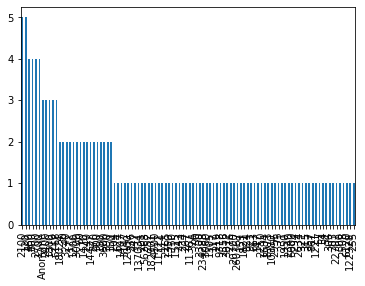

In [90]:
df['amount'].value_counts().plot(kind='bar')

In [91]:
df

,mpesaPaymentId,userId,phoneNumber,amount,createdAt
0,14,53,+254706631814,Anonyme,2018-11-30 14:54:12
1,15,53,+254706631814,Anonyme,2018-12-30 14:54:12
2,16,53,+254706631814,Anonyme,2020-02-29 15:00:41
3,17,53,+254706631814,60,2020-04-29 15:00:41
4,18,53,+254706631814,30,2020-05-29 15:00:41
...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24
140,154,99,+254706631814,2556,2021-02-28 09:45:04
141,155,98,+254706631814,75,2021-02-28 09:46:43
142,156,97,+254706631814,447,2021-02-28 09:48:22


<AxesSubplot:>

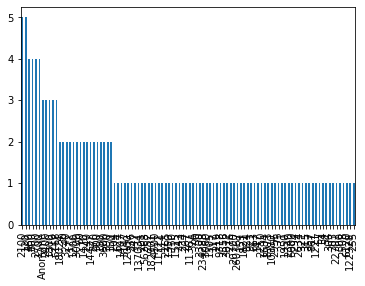

In [95]:
df['amount'].value_counts().plot(kind='bar')

<AxesSubplot:>

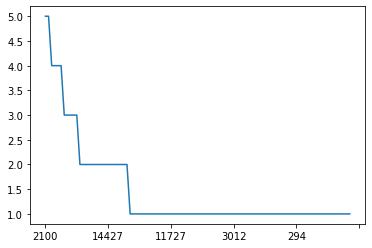

In [96]:
df['amount'].value_counts().plot()

<AxesSubplot:>

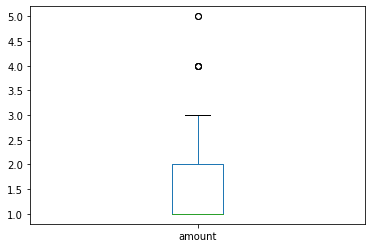

In [98]:
df['amount'].value_counts().plot.box()

# How to create new columns derived from existing columns?

In [106]:
df['ForecastMonthly'] = df['amount']*10

In [103]:
df.iloc[0:3, 3] = 200

In [107]:
df

,mpesaPaymentId,userId,phoneNumber,amount,createdAt,ForecastMonthly
0,14,53,+254706631814,200,2018-11-30 14:54:12,2000
1,15,53,+254706631814,200,2018-12-30 14:54:12,2000
2,16,53,+254706631814,200,2020-02-29 15:00:41,2000
3,17,53,+254706631814,60,2020-04-29 15:00:41,600
4,18,53,+254706631814,30,2020-05-29 15:00:41,300
...,...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24,19500
140,154,99,+254706631814,2556,2021-02-28 09:45:04,25560
141,155,98,+254706631814,75,2021-02-28 09:46:43,750
142,156,97,+254706631814,447,2021-02-28 09:48:22,4470


In [108]:
telcom_renamed = df.rename(columns={'amount': 'Amount', 'createdAt': 'Date'})

In [109]:
telcom_renamed

,mpesaPaymentId,userId,phoneNumber,Amount,Date,ForecastMonthly
0,14,53,+254706631814,200,2018-11-30 14:54:12,2000
1,15,53,+254706631814,200,2018-12-30 14:54:12,2000
2,16,53,+254706631814,200,2020-02-29 15:00:41,2000
3,17,53,+254706631814,60,2020-04-29 15:00:41,600
4,18,53,+254706631814,30,2020-05-29 15:00:41,300
...,...,...,...,...,...,...
139,153,101,+254706631814,1950,2021-02-28 09:38:24,19500
140,154,99,+254706631814,2556,2021-02-28 09:45:04,25560
141,155,98,+254706631814,75,2021-02-28 09:46:43,750
142,156,97,+254706631814,447,2021-02-28 09:48:22,4470


# How to calculate summary statistics?

In [111]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.headd()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [113]:
titanic['age'].mean()

29.69911764705882

In [115]:
titanic[['age', 'fare']].median()

age     28.0000
fare    14.4542
dtype: float64

In [116]:
titanic[['age', 'fare']].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [117]:
titanic[['sex', 'age']].groupby('sex').mean()

,age
sex,
female,27.915709
male,30.726645


In [118]:
titanic.groupby(['sex', 'pclass'])['fare'].mean()

sex     pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: fare, dtype: float64

In [122]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [126]:
titanic.sort_values(by='age').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [128]:
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [130]:
titanic.sort_values(by=['pclass', 'age'], ascending='False')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,no,False
445,1,1,male,4.00,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
802,1,1,male,11.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
435,1,1,female,14.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
